In [21]:
import pandas as pd
import numpy as np
import pickle

from numpy.random import RandomState

In [2]:
df_ori = pd.read_csv('Dataset_RL_Tambahan_09_Juni.csv', delimiter=';')
df_ori

,UserID,Place,Ratings
0,1,Air Terjun Madakaripura,5
1,1,Bunaken Marine Park,5
2,1,Curug Cikaso,5
3,1,Curug Cipendok,5
4,1,Curug Cipamingkis,4
...,...,...,...
75497,822,Taman Spathodea,5
75498,822,Taman Pintar Yogyakarta,4
75499,822,Tebing Breksi,5
75500,822,Saloka Theme Park,5


In [3]:
df_ori = df_ori.sort_values(by='Place')

In [4]:
df_ori['Place'] = df_ori['Place'].astype('category')
df_ori['Id_Place'] = df_ori['Place'].cat.codes

In [5]:
df_ori

,UserID,Place,Ratings,Id_Place
23204,251,Air Terjun Curug Luhur,5,0
20842,226,Air Terjun Curug Luhur,3,0
48663,527,Air Terjun Curug Luhur,4,0
60628,657,Air Terjun Curug Luhur,4,0
21085,228,Air Terjun Curug Luhur,5,0
...,...,...,...,...
37962,411,Watu Gunung Ungaran,4,141
54620,592,Watu Gunung Ungaran,5,141
23293,252,Watu Gunung Ungaran,5,141
49211,533,Watu Gunung Ungaran,5,141


In [6]:
item_id_to_num = dict(zip(df_ori['Id_Place'], df_ori['Place']))

In [7]:
item_id_to_num
pickle.dump(item_id_to_num, open('item_lookup.pkl', 'wb'))

In [8]:
item_id_to_num

{0: 'Air Terjun Curug Luhur',
 1: 'Air Terjun Kali Pancur',
 2: 'Air Terjun Madakaripura',
 3: 'Air Terjun Semirang',
 4: 'Air Terjun Sri Gethuk',
 5: 'Bukit Gantole Cililin',
 6: 'Bukit Jamur',
 7: 'Bukit Moko',
 8: 'Bukit Panguk Kediwung',
 9: 'Bukit Wisata Pulepayung',
 10: 'Bunaken Marine Park',
 11: 'Candi Borobudur',
 12: 'Candi Gedong Songo',
 13: 'Candi Ijo',
 14: 'Candi Prambanan',
 15: 'Candi Ratu Boko',
 16: 'Candi Sewu',
 17: 'Curug Anom',
 18: 'Curug Aseupan',
 19: 'Curug Batu Templek',
 20: 'Curug Bugbrug',
 21: 'Curug Cikaso',
 22: 'Curug Cilengkrang',
 23: 'Curug Cipamingkis',
 24: 'Curug Cipanas',
 25: 'Curug Cipendok',
 26: 'Curug Malela',
 27: 'Curug Tilu Leuwi Opat',
 28: 'Dago Dreampark',
 29: 'Danau Toba',
 30: 'Dunia Fantasi',
 31: 'Farm House Susu Lembang',
 32: 'Glamping Lakeside Rancabali',
 33: 'Grafika Cikole',
 34: 'Green Canyon Pangandaran',
 35: 'Gunung Bromo',
 36: 'Gunung Lalakon',
 37: 'Gunung Papandayan',
 38: 'Gunung Tangkuban Perahu',
 39: 'Indonesi

In [10]:
df_ori = df_ori.sort_values(by='UserID')

In [11]:
df_ori['UserID'] = df_ori['UserID'].astype('category')
df_ori['Id_ID'] = df_ori['UserID'].cat.codes

In [12]:
df_ori

,UserID,Place,Ratings,Id_Place,Id_ID
79,1,Pantai Ngobaran,5,75,0
14,1,Pantai Kelingking,5,66,0
7,1,Green Canyon Pangandaran,4,34,0
61,1,Taman Mini Indonesia Indah,2,122,0
62,1,Taman Safari Indonesia Bogor,5,126,0
...,...,...,...,...,...
75422,822,Pantai Kasap,5,65,821
75476,822,Air Terjun Sri Gethuk,5,4,821
75419,822,Pantai Balekambang,4,54,821
75471,822,Taman Situ Lembang,5,129,821


In [14]:
user_id_to_num = dict(zip(df_ori['UserID'], df_ori['Id_ID']))

In [15]:
pickle.dump(user_id_to_num, open('user_id_to_num.pkl', 'wb'))

In [16]:
df_ori

,UserID,Place,Ratings,Id_Place,Id_ID
79,1,Pantai Ngobaran,5,75,0
14,1,Pantai Kelingking,5,66,0
7,1,Green Canyon Pangandaran,4,34,0
61,1,Taman Mini Indonesia Indah,2,122,0
62,1,Taman Safari Indonesia Bogor,5,126,0
...,...,...,...,...,...
75422,822,Pantai Kasap,5,65,821
75476,822,Air Terjun Sri Gethuk,5,4,821
75419,822,Pantai Balekambang,4,54,821
75471,822,Taman Situ Lembang,5,129,821


In [18]:
new_df = pd.DataFrame()
new_df['user_id'] = df_ori['Id_ID']
new_df['place_id'] = df_ori['Id_Place']
new_df['rating'] = df_ori['Ratings']

In [22]:
data = new_df.to_numpy()
data

array([[  0,  75,   5],
       [  0,  66,   5],
       [  0,  34,   4],
       ...,
       [821,  54,   4],
       [821, 129,   5],
       [821,  91,   5]], dtype=int64)

In [20]:
np.save('data_RL_75000.npy', data)

In [52]:
rng = np.random.default_rng(42)
rng.shuffle(data)

train_data = data[:int(0.8 * data.shape[0])]
test_data = data[int(0.8 * data.shape[0]):]

In [53]:
train_data

array([[ 43,  51,   4],
       [224,  34,   5],
       [382,  27,   4],
       ...,
       [234,  46,   5],
       [712,  46,   4],
       [ 48,  99,   5]], dtype=int64)

In [96]:
from collections import Counter
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler

from matplotlib import pyplot

In [97]:
y_train = train_data[:, 2]
x_train = train_data[:,:2]

Class=1, n=1495 (3.776%)
Class=2, n=1376 (3.475%)
Class=3, n=3670 (9.270%)
Class=4, n=12241 (30.918%)
Class=5, n=20810 (52.561%)


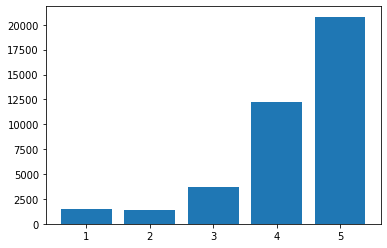

In [103]:
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [99]:
trim_strategy = {5:20810}

under = RandomUnderSampler(sampling_strategy=trim_strategy)

In [100]:
x_train, y_train = under.fit_resample(x_train, y_train)
print("Setelah undersampling")
print(Counter(y_train))

Setelah undersampling
Counter({5: 20810, 4: 12241, 3: 3670, 1: 1495, 2: 1376})


In [94]:
strategy = {1:3576, 2:3457}

over = KMeansSMOTE(sampling_strategy=strategy)

In [95]:
x_train, y_train = over.fit_resample(x_train, y_train)
print("Setelah oversampling")
print(Counter(y_train))

Setelah oversampling
Counter({5: 20810, 4: 12241, 3: 3670, 1: 2081, 2: 2081})


In [109]:
y_train_m = np.reshape(y_train, (len(y_train), 1))

In [110]:
f_train_data = np.concatenate((x_train, y_train_m), axis=1)

In [111]:
f_train_data

array([[751,  53,   1],
       [601,  53,   1],
       [ 74,  25,   1],
       ...,
       [293,  34,   5],
       [744,  43,   5],
       [566, 125,   5]], dtype=int64)

In [112]:
np.save('train_data_RL_75000.npy', f_train_data)
np.save('test_data_RL_75000.npy', test_data)